<a href="https://colab.research.google.com/github/mscsoliz/Prueba/blob/main/TP5_G3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DETERMINAR EL IMPACTO DE UNA NOTICIA PUBLICADA POR LOS PERIODISTAS EN MEDIOS DIGITALES

# 1. COMPRENSIÓN DEL NEGOCIO

## 1.1 Objetivo del Negocio

Se determinará el impacto de una noticia publicada por los periodistas mediante técnicas de Minería de Datos. Se requiere obtener la cantidad de notas que producen los periodistas en el portal digital (CMS Web), luego saber en qué sección de noticias se producen más, y finalmente los horarios más frecuentes de publicación.

## 1.2 Recursos

Los periodistas escriben en el portal digital (CMS). Podemos acceder a este sistema a traves de reportes y estos datos serán exportados a archivos excel.

En cuanto a las restricciones, en este portal solamente se pueden bajar 200 registros por ejecución, lo cual nos darán bastantes archivos para luego unirlos y es por ese motivo que se trabajará con la data del primer semestre de este año 2024 (1 de enero al 30 de junio).

Las herramientas para este trabajo serán: Python y Excel.


# 2. COMPRENSIÓN DE DATOS

## 2.1 Descripción de los datos

La información recolectada se encuentra en el archivo Excel (alojados en el drive) con 17094 filas y 17 columnas.

Cada registro contiene estas características:
"Status": Estado (numérica)
"Title": Título de la nota (texto)
"Secciones_Web": Seccion de la nota (texto)
"Fecha_Publicacion": Fecha y Hora de publicación (texto)
"Fecha_Creacion": Fecha y Hora de creación (texto)
"Autor": Firma (texto)
"Creador": Periodista (texto)
"Link": Hipervinculo de la nota (texto)
"Mes": Mes de la nota (numérica)
"Dia": Dia de la nota (numérica)
"Año": Año de la nota (numérica)
"Hora": Hora de la nota (texto)
"Hora_Publicacion": Hora de Publicación (numérica)
"Seccion": Sección de la nota (texto)
"Cod_Impacto": Código de Impacto por nota (numérica)
"Impacto": Impacto por nota (texto)
"Visitas": Cantidad de visitas por nota (numérica)



## 2.2 Exploración de los datos

In [ ]:
#CARGA DE LIBRERIAS
import pandas as pd
import numpy as np
import requests
import openpyxl
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
#MONTAR DRIVE Y LEER BD_DIGITAL
from google.colab import drive
# Montar el Drive
drive.mount('/content/drive')

ruta_archivo = "/content/drive/MyDrive/BD/bd_digital.xlsx"
df_digital = pd.read_excel(ruta_archivo, sheet_name='Datos')
df_digital.head()

Mounted at /content/drive


,Status,Title,Secciones_Web,Fecha_Publicacion,Fecha_Creacion,Autor,Creador,Link,Mes,Dia,Año,Hora,Hora_Publicacion,Seccion,Cod_Impacto,Impacto,Visitas
0,PUBLISHED,Bolivia pasará de país exportador a transport...,"ECONOMÍA, Edición Impresa","Jan 30, 2024 - 04:00 AM","Jan 29, 2024 - 11:07 PM",Ernesto Estremadoiro Flores,Ernesto Guevarra,https://eldeber.com.bo/355054_bolivia-pasara-d...,Jan,30,2024,04:00 AM,4,ECONOMÍA,7,Gran Impacto,91295
1,PUBLISHED,La ANH garantiza abastecimiento de combustible...,ECONOMÍA,"Jan 29, 2024 - 12:17 PM","Jan 29, 2024 - 12:01 PM",Ernesto Estremadoiro Flores,Ernesto Guevarra,https://eldeber.com.bo/354986_la-anh-garantiza...,Jan,29,2024,12:17 PM,12,ECONOMÍA,7,Gran Impacto,85746
2,PUBLISHED,"Cainco: ""No dejemos que la política se siga co...",ECONOMÍA,"Jan 26, 2024 - 07:20 PM","Jan 26, 2024 - 06:39 PM",Lourdes Molina Rea,Lourdes Molina Rea,https://eldeber.com.bo/354746_cainco-no-dejemo...,Jan,26,2024,07:20 PM,19,ECONOMÍA,7,Gran Impacto,54910
3,PUBLISHED,Bloquean ingreso de trenes a la ciudad y ponen...,ECONOMÍA,"Jan 24, 2024 - 09:02 AM","Jan 24, 2024 - 09:10 AM",Raúl Domínguez,rado_bo@yahoo.com,https://eldeber.com.bo/354409_bloquean-ingreso...,Jan,24,2024,09:02 AM,9,ECONOMÍA,7,Gran Impacto,84434
4,PUBLISHED,"Padrón de contribuyentes del SIN creció 4,2% e...","ECONOMÍA, Dinero, Edición Impresa","Jan 23, 2024 - 04:24 PM","Jan 23, 2024 - 04:28 PM",Raúl Domínguez,Beatriz Pinzon,https://eldeber.com.bo/354339_padron-de-contri...,Jan,23,2024,04:24 PM,16,ECONOMÍA,7,Gran Impacto,98429


In [ ]:
#FILAS Y COLUMNAS
df_digital.shape

(17094, 17)

La data obtenida de digital cuenta con 17094 filas y 17 columnas.

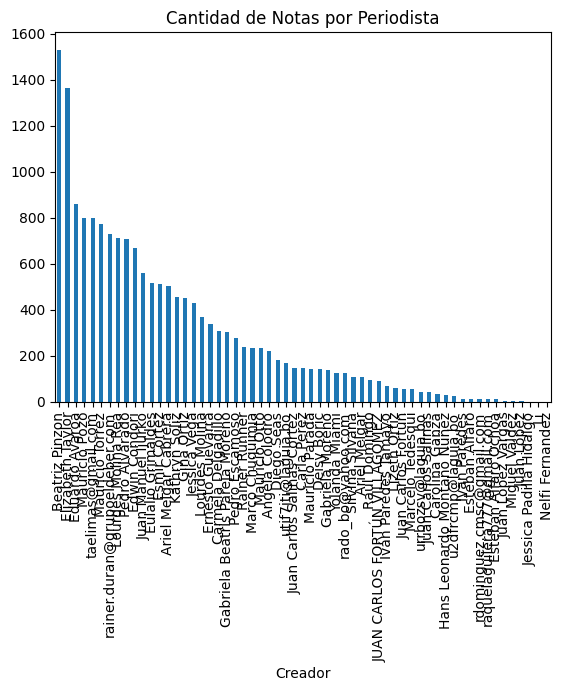

In [ ]:
# GRÁFICOS DE DISTRIBUCIÓN POR PERIODISTA DIGITAL
import numpy as np
import matplotlib.pyplot as plt

datos=df_digital['Creador']
plt = datos.value_counts().plot(kind='bar',title='Cantidad de Notas por Periodista')

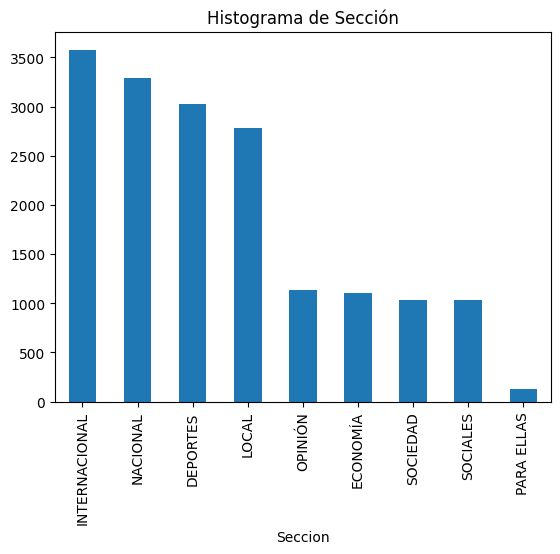

In [ ]:
# GRÁFICOS DE DISTRIBUCIÓN POR SECCIONES
import numpy as np
import matplotlib.pyplot as plt

datos=df_digital['Seccion']
plt = datos.value_counts().plot(kind='bar',title='Histograma de Sección')

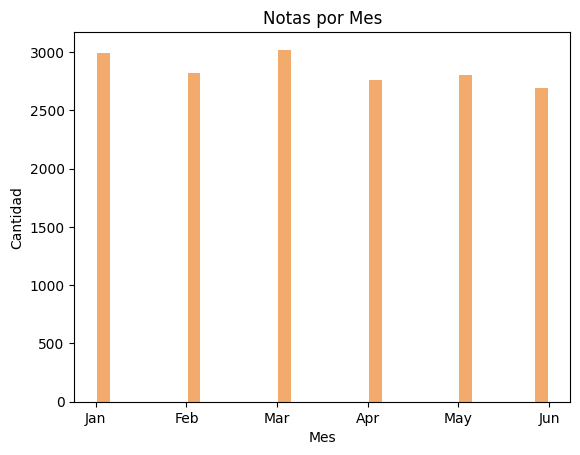

In [ ]:
# GRÁFICO - CANTIDAD DE NOTAS POR MES
import numpy as np
import matplotlib.pyplot as plt

datos = df_digital['Mes']
plt.hist(x=datos, bins=30, color='#F2AB6D', rwidth=0.85)
plt.title('Notas por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.show()

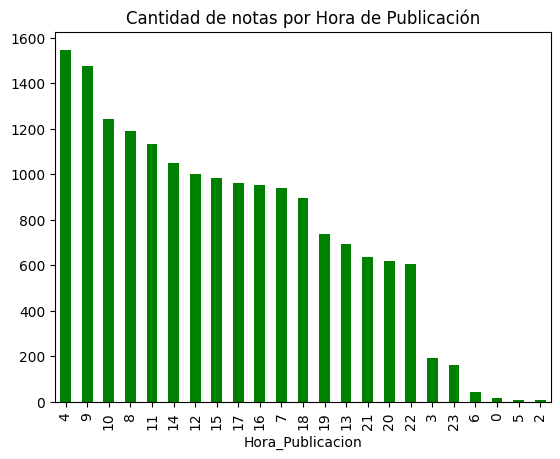

In [ ]:
# GRÁFICO - HORAS DE PUBLICACIÓN
datos = df_digital['Hora_Publicacion']
plt = datos.value_counts().plot(kind='bar',color='green',title='Cantidad de notas por Hora de Publicación')

## 2.3 Calidad de los datos

In [ ]:
# RANGOS DE LAS VARIABLES NUMÉRICAS
df_digital.describe()   # muestra resumen del dataframe

,Dia,Año,Hora_Publicacion,Cod_Impacto,Visitas
count,17094.000000,17094.0,17094.000000,17094.000000,17094.000000
mean,15.337253,2024.0,12.653563,3.567802,17526.126302
std,8.479470,0.0,5.225979,1.793775,20523.606006
min,1.000000,2024.0,0.000000,1.000000,1.000000
25%,8.000000,2024.0,9.000000,2.000000,3317.250000
50%,16.000000,2024.0,12.000000,3.000000,9689.500000
75%,23.000000,2024.0,17.000000,5.000000,24265.000000
max,31.000000,2024.0,23.000000,7.000000,99988.000000


In [ ]:
# COLUMNAS QUE TIENEN DATOS NULOS
df_digital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17094 entries, 0 to 17093
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Status             17094 non-null  object
 1   Title              17094 non-null  object
 2   Secciones_Web      17094 non-null  object
 3   Fecha_Publicacion  17094 non-null  object
 4   Fecha_Creacion     17094 non-null  object
 5   Autor              15816 non-null  object
 6   Creador            17094 non-null  object
 7   Link               17094 non-null  object
 8   Mes                17094 non-null  object
 9   Dia                17094 non-null  int64 
 10  Año                17094 non-null  int64 
 11  Hora               17094 non-null  object
 12  Hora_Publicacion   17094 non-null  int64 
 13  Seccion            17094 non-null  object
 14  Cod_Impacto        17094 non-null  int64 
 15  Impacto            17094 non-null  object
 16  Visitas            17094 non-null  int64

Según estos datos, se tienen datos nulos en la columan Autor.

In [ ]:
#CANTIDAD DE DATOS NULOS POR COLUMNA
df_digital.isnull().sum()

,0
Status,0
Title,0
Secciones_Web,0
Fecha_Publicacion,0
Fecha_Creacion,0
Autor,1278
Creador,0
Link,0
Mes,0
Dia,0


# 3. PREPARACIÓN DE LOS DATOS

## 3.1 Selección de los datos

In [ ]:
#RENOMBRAR ALGUNAS COLUMNAS PARA SU MEJOR COMPRENSIÓN
df_digital.rename(columns={'Status':'Estado',
                           'Title': 'Titulo',
                         'Autor':'Firma',
                        'Creador':'Periodista'}, inplace=True)



In [ ]:
df_digital.columns.tolist()

['Estado',
 'Titulo',
 'Secciones_Web',
 'Fecha_Publicacion',
 'Fecha_Creacion',
 'Firma',
 'Periodista',
 'Link',
 'Mes',
 'Dia',
 'Año',
 'Hora',
 'Hora_Publicacion',
 'Seccion',
 'Cod_Impacto',
 'Impacto',
 'Visitas']

In [ ]:
# REVISAR LAS COLUMNAS CON DATOS NULOS
df_digital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17094 entries, 0 to 17093
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Estado             17094 non-null  object
 1   Titulo             17094 non-null  object
 2   Secciones_Web      17094 non-null  object
 3   Fecha_Publicacion  17094 non-null  object
 4   Fecha_Creacion     17094 non-null  object
 5   Firma              15816 non-null  object
 6   Periodista         17094 non-null  object
 7   Link               17094 non-null  object
 8   Mes                17094 non-null  object
 9   Dia                17094 non-null  int64 
 10  Año                17094 non-null  int64 
 11  Hora               17094 non-null  object
 12  Hora_Publicacion   17094 non-null  int64 
 13  Seccion            17094 non-null  object
 14  Cod_Impacto        17094 non-null  int64 
 15  Impacto            17094 non-null  object
 16  Visitas            17094 non-null  int64

Todos deberían tener 17094 registros pero vemos que la columna Firma(Autor) tiene menos registros (15816), por lo tanto tiene nulos.

In [ ]:
# RECUENTO DE CAMPOS NULOS
df_digital.isnull().sum()

,0
Estado,0
Titulo,0
Secciones_Web,0
Fecha_Publicacion,0
Fecha_Creacion,0
Firma,1278
Periodista,0
Link,0
Mes,0
Dia,0


En la columna Firma (Autor) se muestra que tienen 1278 valores nulos, los cuales vamos a trabajar.

In [ ]:
# VISUALIZAR EL PORCENTAJE DE VALORES NULOS
print(df_digital.isnull().mean() * 100)

Estado               0.000000
Titulo               0.000000
Secciones_Web        0.000000
Fecha_Publicacion    0.000000
Fecha_Creacion       0.000000
Firma                7.476307
Periodista           0.000000
Link                 0.000000
Mes                  0.000000
Dia                  0.000000
Año                  0.000000
Hora                 0.000000
Hora_Publicacion     0.000000
Seccion              0.000000
Cod_Impacto          0.000000
Impacto              0.000000
Visitas              0.000000
dtype: float64


Se tiene un 7.48% de valores nulos en la columna Firma (Autor).

## 3.2 Limpieza de los datos

In [ ]:
# FILAS Y COLUMNAS
print(df_digital.shape)

(17094, 17)


In [ ]:
#COLUMNAS DEL DS
df_digital.columns.tolist()

['Estado',
 'Titulo',
 'Secciones_Web',
 'Fecha_Publicacion',
 'Fecha_Creacion',
 'Firma',
 'Periodista',
 'Link',
 'Mes',
 'Dia',
 'Año',
 'Hora',
 'Hora_Publicacion',
 'Seccion',
 'Cod_Impacto',
 'Impacto',
 'Visitas']

Se trabajará la columna que tiene datos nulos.

In [ ]:
# RELLENAR LA COLUMNA FIRMA (AUTOR) QUE TIENE DATOS NULOS CON EL VALOR "SIN_FIRMA"
df_digital['Firma'] = df_digital['Firma'].fillna('SIN_FIRMA')


Para los valores nulos se rellena en campo Autor con el valor SIN_FIRMA.

In [ ]:
df_digital.head()

,Estado,Titulo,Secciones_Web,Fecha_Publicacion,Fecha_Creacion,Firma,Periodista,Link,Mes,Dia,Año,Hora,Hora_Publicacion,Seccion,Cod_Impacto,Impacto,Visitas
0,PUBLISHED,Bolivia pasará de país exportador a transport...,"ECONOMÍA, Edición Impresa","Jan 30, 2024 - 04:00 AM","Jan 29, 2024 - 11:07 PM",Ernesto Estremadoiro Flores,Ernesto Guevarra,https://eldeber.com.bo/355054_bolivia-pasara-d...,Jan,30,2024,04:00 AM,4,ECONOMÍA,7,Gran Impacto,91295
1,PUBLISHED,La ANH garantiza abastecimiento de combustible...,ECONOMÍA,"Jan 29, 2024 - 12:17 PM","Jan 29, 2024 - 12:01 PM",Ernesto Estremadoiro Flores,Ernesto Guevarra,https://eldeber.com.bo/354986_la-anh-garantiza...,Jan,29,2024,12:17 PM,12,ECONOMÍA,7,Gran Impacto,85746
2,PUBLISHED,"Cainco: ""No dejemos que la política se siga co...",ECONOMÍA,"Jan 26, 2024 - 07:20 PM","Jan 26, 2024 - 06:39 PM",Lourdes Molina Rea,Lourdes Molina Rea,https://eldeber.com.bo/354746_cainco-no-dejemo...,Jan,26,2024,07:20 PM,19,ECONOMÍA,7,Gran Impacto,54910
3,PUBLISHED,Bloquean ingreso de trenes a la ciudad y ponen...,ECONOMÍA,"Jan 24, 2024 - 09:02 AM","Jan 24, 2024 - 09:10 AM",Raúl Domínguez,rado_bo@yahoo.com,https://eldeber.com.bo/354409_bloquean-ingreso...,Jan,24,2024,09:02 AM,9,ECONOMÍA,7,Gran Impacto,84434
4,PUBLISHED,"Padrón de contribuyentes del SIN creció 4,2% e...","ECONOMÍA, Dinero, Edición Impresa","Jan 23, 2024 - 04:24 PM","Jan 23, 2024 - 04:28 PM",Raúl Domínguez,Beatriz Pinzon,https://eldeber.com.bo/354339_padron-de-contri...,Jan,23,2024,04:24 PM,16,ECONOMÍA,7,Gran Impacto,98429


In [ ]:
df_digital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17094 entries, 0 to 17093
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Estado             17094 non-null  object
 1   Titulo             17094 non-null  object
 2   Secciones_Web      17094 non-null  object
 3   Fecha_Publicacion  17094 non-null  object
 4   Fecha_Creacion     17094 non-null  object
 5   Firma              17094 non-null  object
 6   Periodista         17094 non-null  object
 7   Link               17094 non-null  object
 8   Mes                17094 non-null  object
 9   Dia                17094 non-null  int64 
 10  Año                17094 non-null  int64 
 11  Hora               17094 non-null  object
 12  Hora_Publicacion   17094 non-null  int64 
 13  Seccion            17094 non-null  object
 14  Cod_Impacto        17094 non-null  int64 
 15  Impacto            17094 non-null  object
 16  Visitas            17094 non-null  int64

Revisamos nuevamente y ahora no se tienen datos nulos.

In [ ]:
# CONTEO DE LOS NIVELES O VALORES EN LAS DIFERENTES COLUMNAS CATEGÓRICAS

cols_cat = ['Estado', 'Titulo', 'Secciones_Web', 'Fecha_Publicacion', 'Fecha_Creacion','Firma',
                      'Periodista', 'Link', 'Mes', 'Dia', 'Año', 'Hora', 'Hora_Publicacion', 'Seccion','Cod_Impacto','Impacto','Visitas']

for col in cols_cat:
  print(f'Columna {col}: {df_digital[col].nunique()} subniveles')

Columna Estado: 1 subniveles
Columna Titulo: 16858 subniveles
Columna Secciones_Web: 238 subniveles
Columna Fecha_Publicacion: 14600 subniveles
Columna Fecha_Creacion: 15544 subniveles
Columna Firma: 282 subniveles
Columna Periodista: 59 subniveles
Columna Link: 17094 subniveles
Columna Mes: 6 subniveles
Columna Dia: 31 subniveles
Columna Año: 1 subniveles
Columna Hora: 1084 subniveles
Columna Hora_Publicacion: 23 subniveles
Columna Seccion: 9 subniveles
Columna Cod_Impacto: 7 subniveles
Columna Impacto: 7 subniveles
Columna Visitas: 12856 subniveles


Una columna categóricas tienen 1 subnivel. Eliminaremos la columna Estado y Año, porque todas las filas que se trajeron son con el estado Publicado y año 2024

In [ ]:
# ELIMINAR LA COLUMNA 'Estado' (Status)
df_digital = df_digital.drop('Estado', axis=1)

In [ ]:
# ELIMINAR LA COLUMNA 'Año'
df_digital = df_digital.drop('Año', axis=1)

In [ ]:
df_digital.head()

,Titulo,Secciones_Web,Fecha_Publicacion,Fecha_Creacion,Firma,Periodista,Link,Mes,Dia,Hora,Hora_Publicacion,Seccion,Cod_Impacto,Impacto,Visitas
0,Bolivia pasará de país exportador a transport...,"ECONOMÍA, Edición Impresa","Jan 30, 2024 - 04:00 AM","Jan 29, 2024 - 11:07 PM",Ernesto Estremadoiro Flores,Ernesto Guevarra,https://eldeber.com.bo/355054_bolivia-pasara-d...,Jan,30,04:00 AM,4,ECONOMÍA,7,Gran Impacto,91295
1,La ANH garantiza abastecimiento de combustible...,ECONOMÍA,"Jan 29, 2024 - 12:17 PM","Jan 29, 2024 - 12:01 PM",Ernesto Estremadoiro Flores,Ernesto Guevarra,https://eldeber.com.bo/354986_la-anh-garantiza...,Jan,29,12:17 PM,12,ECONOMÍA,7,Gran Impacto,85746
2,"Cainco: ""No dejemos que la política se siga co...",ECONOMÍA,"Jan 26, 2024 - 07:20 PM","Jan 26, 2024 - 06:39 PM",Lourdes Molina Rea,Lourdes Molina Rea,https://eldeber.com.bo/354746_cainco-no-dejemo...,Jan,26,07:20 PM,19,ECONOMÍA,7,Gran Impacto,54910
3,Bloquean ingreso de trenes a la ciudad y ponen...,ECONOMÍA,"Jan 24, 2024 - 09:02 AM","Jan 24, 2024 - 09:10 AM",Raúl Domínguez,rado_bo@yahoo.com,https://eldeber.com.bo/354409_bloquean-ingreso...,Jan,24,09:02 AM,9,ECONOMÍA,7,Gran Impacto,84434
4,"Padrón de contribuyentes del SIN creció 4,2% e...","ECONOMÍA, Dinero, Edición Impresa","Jan 23, 2024 - 04:24 PM","Jan 23, 2024 - 04:28 PM",Raúl Domínguez,Beatriz Pinzon,https://eldeber.com.bo/354339_padron-de-contri...,Jan,23,04:24 PM,16,ECONOMÍA,7,Gran Impacto,98429


In [ ]:
# FILAS Y COLUMNAS
print(df_digital.shape)


(17094, 15)


Como se ve, ahora solo tenemos 15 columnas. Antes teníamos 17.

In [ ]:
# IDENTIFICAR FILAS DUPLICADAS
duplicados = df_digital.duplicated()
print(duplicados)

0        False
1        False
2        False
3        False
4        False
         ...  
17089    False
17090    False
17091    False
17092    False
17093    False
Length: 17094, dtype: bool


No existen datos duplicados

In [ ]:
# ANÁLISIS DE VALORES NEGATIVOS
df_digital.describe()

,Dia,Hora_Publicacion,Cod_Impacto,Visitas
count,17094.000000,17094.000000,17094.000000,17094.000000
mean,15.337253,12.653563,3.567802,17526.126302
std,8.479470,5.225979,1.793775,20523.606006
min,1.000000,0.000000,1.000000,1.000000
25%,8.000000,9.000000,2.000000,3317.250000
50%,16.000000,12.000000,3.000000,9689.500000
75%,23.000000,17.000000,5.000000,24265.000000
max,31.000000,23.000000,7.000000,99988.000000


Todas las columnas numéricas tienen desviaciones estándar ("std") diferentes de cero, lo que indica que no tienen un único valor.

Tambien se puede apreciar que NO existen valores negativos.

## 3.2 Transformación

In [ ]:
# TRANSFORMAR VARIABLES CATEGÓRICAS A NÚMEROS: COLUMNA "PERIODISTA"
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
df_digital['n_Periodista'] = label_encoder.fit_transform(df_digital['Periodista'])
df_digital[['Periodista', 'n_Periodista']].head(10)

,Periodista,n_Periodista
0,Ernesto Guevarra,12
1,Ernesto Guevarra,12
2,Lourdes Molina Rea,36
3,rado_bo@yahoo.com,51
4,Beatriz Pinzon,3
5,Ernesto Guevarra,12
6,Ernesto Guevarra,12
7,Gina Ortiz,19
8,Juan Carlos Salinas Cortez,28
9,Juan Carlos Salinas Cortez,28


In [ ]:
df_digital.n_Periodista.value_counts()

,count
n_Periodista,
3,1530
11,1362
9,859
41,801
55,801
42,771
52,730
36,711
45,709


In [ ]:
# TRANSFORMAR VARIABLES CATEGÓRICAS A NÚMEROS: COLUMNA "SECCION"
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
df_digital['n_Seccion'] = label_encoder.fit_transform(df_digital['Seccion'])
df_digital[['Seccion', 'n_Seccion']].head(10)

,Seccion,n_Seccion
0,ECONOMÍA,1
1,ECONOMÍA,1
2,ECONOMÍA,1
3,ECONOMÍA,1
4,ECONOMÍA,1
5,ECONOMÍA,1
6,ECONOMÍA,1
7,ECONOMÍA,1
8,ECONOMÍA,1
9,ECONOMÍA,1


In [ ]:
df_digital.n_Seccion.value_counts()

,count
n_Seccion,
2,3579
4,3290
0,3025
3,2778
5,1132
1,1101
8,1034
7,1030
6,125


Matriz de Correlación

                       Dia  Hora_Publicacion  Cod_Impacto   Visitas  \
Dia               1.000000          0.005560     0.007730  0.010024   
Hora_Publicacion  0.005560          1.000000     0.117594  0.105615   
Cod_Impacto       0.007730          0.117594     1.000000  0.882385   
Visitas           0.010024          0.105615     0.882385  1.000000   
n_Periodista     -0.040669          0.129214    -0.034533 -0.033161   
n_Seccion        -0.005195         -0.127989     0.005973  0.036279   

                  n_Periodista  n_Seccion  
Dia                  -0.040669  -0.005195  
Hora_Publicacion      0.129214  -0.127989  
Cod_Impacto          -0.034533   0.005973  
Visitas              -0.033161   0.036279  
n_Periodista          1.000000  -0.159511  
n_Seccion            -0.159511   1.000000  


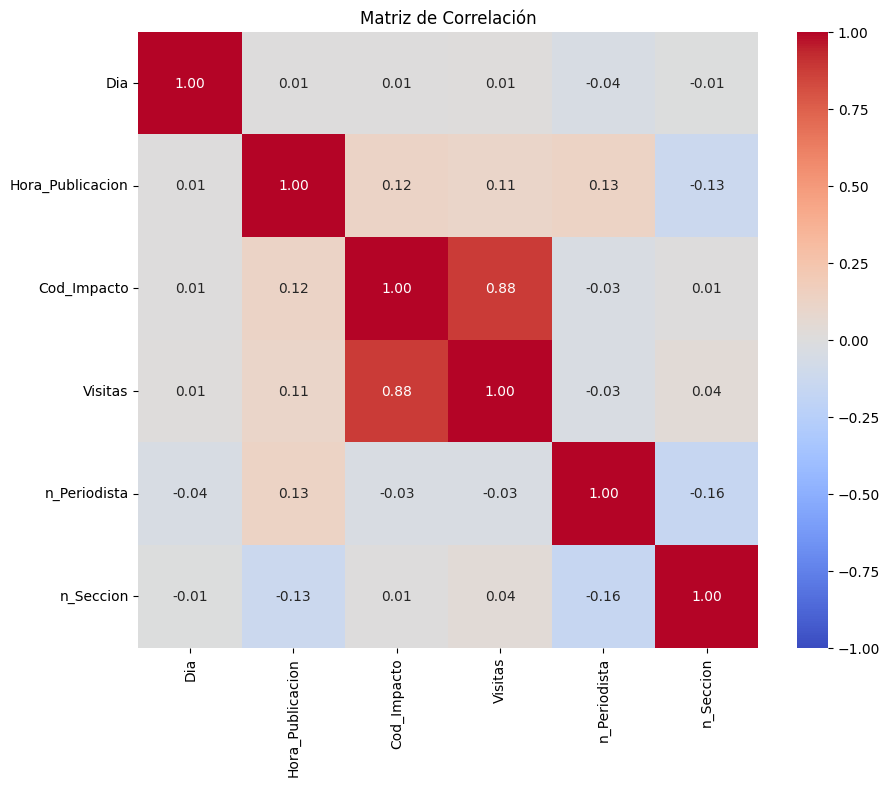

In [ ]:
# MATRIZ DE CORRELACIÓN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de correlación
df2 = df_digital.select_dtypes(include=[np.number])
corr= df2.corr()
print(corr)

# Crear el gráfico de calor
plt.figure(figsize=(10, 8))  # Tamaño de la figura
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

# Mostrar el gráfico
plt.title('Matriz de Correlación')
plt.show()


Como se puede apreciar existe una fuerte correlación entre el Impacto y las Visitas.

# 4. MODELADO

## 4.1 Selección de técnicas de modelado

Para el modelado vamos a utilizar los siguientes algoritmos:
- Regresión Logística
- Árbol de Decisión

## 4.2 Generación de plan de pruebas

In [ ]:
# DEFINI LAS VARIABLES INDEPENDIENTES (x), Y LA VARIABLE DEPENDIENTE (y)
x = df_digital[['Visitas', 'n_Periodista','n_Seccion','Hora_Publicacion']]
y = df_digital['Cod_Impacto']

In [ ]:
# DIVIDIR EL DATASET EN UN 70% DE ENTRENAMIENTO Y 30% DE EVALUACIÓN (test)
from sklearn.model_selection import train_test_split
from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
# NORMALIZACIÓN DE VARIABLES
from sklearn.preprocessing import StandardScaler

standard_x = StandardScaler()
x_train = standard_x.fit_transform(x_train)
x_test = standard_x.fit_transform(x_test)
print(x_train)
print(x_test)

[[ 3.72479515e-02  1.08827804e+00 -1.33621094e+00 -5.09226668e-01]
 [-4.66006307e-01 -3.81225161e-02 -5.95343352e-04 -7.00628580e-01]
 [-4.09932187e-01 -1.27716313e+00 -4.45800544e-01  1.59619437e+00]
 ...
 [-5.15600966e-01 -1.27716313e+00 -4.45800544e-01 -7.00628580e-01]
 [-4.22306493e-01  1.36987818e+00  4.44609857e-01 -8.92030492e-01]
 [ 3.75105481e-01  1.08827804e+00 -1.33621094e+00 -8.92030492e-01]]
[[ 0.55855305 -1.29990843 -0.47336633  0.64312151]
 [ 1.81367791 -1.18779667  0.41337433 -0.50440683]
 [-0.46838058 -1.29990843 -0.47336633  1.79064985]
 ...
 [ 0.885996   -1.24385255  0.41337433  0.26061206]
 [-0.53038853 -0.45907023  1.74348532  1.98190457]
 [-0.49236479 -0.79540551 -1.36010699 -0.88691628]]


## 4.3 Construcción del modelo

## 4.3.1 Algoritmo de Regresión Logística

In [ ]:
# ENTRENAR EL MODELO DE REGRESIÓN LOGISTICA
# AJUSTE DEL MODELO
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(random_state = 0,max_iter=1000)
reg.fit(x_train, y_train)

# PREDICCIÓN
pred = reg.predict(x_test)
print(pred)

[5 7 3 ... 6 3 3]


In [ ]:
# EVALUACIÓN
# MATRIZ DE CONFUSIÓN
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, pred)
conf_mat

array([[789,   0,   0,   0,   0,   0,   0],
       [ 82, 752,  60,   0,   0,   0,   0],
       [  0,   0, 960,   0,   0,   0,   0],
       [  0,   0,  67, 796,  34,   0,   0],
       [  0,   0,   0,   0, 809,   0,   0],
       [  0,   0,   0,   0,  40, 344,   0],
       [  0,   0,   0,   0,   0,  11, 385]])

In [ ]:
# PRESICIÓN
print("Porcentaje de presicion:", metrics.accuracy_score(y_test, pred))

Porcentaje de presicion: 0.9426788847728602


In [ ]:
# INFORME DE CLASIFICACIÓN
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.91      1.00      0.95       789
           2       1.00      0.84      0.91       894
           3       0.88      1.00      0.94       960
           4       1.00      0.89      0.94       897
           5       0.92      1.00      0.96       809
           6       0.97      0.90      0.93       384
           7       1.00      0.97      0.99       396

    accuracy                           0.94      5129
   macro avg       0.95      0.94      0.95      5129
weighted avg       0.95      0.94      0.94      5129



In [ ]:
df_digital.tail()

,Titulo,Secciones_Web,Fecha_Publicacion,Fecha_Creacion,Firma,Periodista,Link,Mes,Dia,Hora,Hora_Publicacion,Seccion,Cod_Impacto,Impacto,Visitas,n_Periodista,n_Seccion
17089,El liderazgo integral y su importancia en la e...,"Te Puede Interesar, Universidades","Jun 11, 2024 - 02:49 PM","Jun 11, 2024 - 03:12 PM",SIN_FIRMA,Angela Colodro,https://eldeber.com.bo/370869_el-liderazgo-int...,Jun,11,02:49 PM,14,SOCIEDAD,1,Cero Impacto,687,0,8
17090,¿Cuál será el futuro del Administrador en la e...,"Te Puede Interesar, Universidades","Jun 10, 2024 - 03:08 PM","Jun 10, 2024 - 03:06 PM",SIN_FIRMA,Angela Colodro,https://eldeber.com.bo/370755_cual-sera-el-fut...,Jun,10,03:08 PM,15,SOCIEDAD,1,Cero Impacto,122,0,8
17091,Siete cosas que debes tomar en cuenta para via...,Tendencias,"Jan 6, 2024 - 07:00 AM","Jan 5, 2024 - 10:13 PM",EL DEBER,Lourdes Molina Rea,https://eldeber.com.bo/352575_siete-cosas-que-...,Jan,6,07:00 AM,7,SOCIEDAD,1,Cero Impacto,882,36,8
17092,30 años de la carrera de Medicina: Celebramos ...,Universidades,"Jun 25, 2024 - 05:11 PM","Jun 25, 2024 - 05:14 PM",EL DEBER,Mauricio Torrez,https://eldeber.com.bo/373175_30-anos-de-la-ca...,Jun,25,05:11 PM,17,SOCIEDAD,1,Cero Impacto,987,42,8
17093,Generando más de 500 modelos de negocio a trav...,Universidades,"Jun 3, 2024 - 04:21 PM","Jun 3, 2024 - 03:51 PM",SIN_FIRMA,Angela Colodro,https://eldeber.com.bo/370088_generando-mas-de...,Jun,3,04:21 PM,16,SOCIEDAD,1,Cero Impacto,615,0,8


In [ ]:
#PREDECIR UN CASO PARTICULAR
#Impactos: 1 (Cero Impacto), 2 (Bajo), 3 (Medio Bajo), 4 (Medio), 5(Medio Alto), 6(Alto), 7(Gran Impacto)
p = {'Visitas':[100000],
     'n_Periodista':[6],
     'n_Seccion':[2],
        'Hora_Publicacion':[9]}

# Crear el DataFrame
x_new = pd.DataFrame(p)
x_new = x_new.values
print(reg.predict(x_new))

[7]


El resultado es el código del impacto.

## 4.3.2 Algoritmo Árbol de Decisiones

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

print(df_digital.head())

                                              Titulo  \
0  Bolivia pasará de país exportador  a transport...   
1  La ANH garantiza abastecimiento de combustible...   
2  Cainco: "No dejemos que la política se siga co...   
3  Bloquean ingreso de trenes a la ciudad y ponen...   
4  Padrón de contribuyentes del SIN creció 4,2% e...   

                       Secciones_Web        Fecha_Publicacion  \
0          ECONOMÍA, Edición Impresa  Jan 30, 2024 - 04:00 AM   
1                           ECONOMÍA  Jan 29, 2024 - 12:17 PM   
2                           ECONOMÍA  Jan 26, 2024 - 07:20 PM   
3                           ECONOMÍA  Jan 24, 2024 - 09:02 AM   
4  ECONOMÍA, Dinero, Edición Impresa  Jan 23, 2024 - 04:24 PM   

            Fecha_Creacion                        Firma          Periodista  \
0  Jan 29, 2024 - 11:07 PM  Ernesto Estremadoiro Flores    Ernesto Guevarra   
1  Jan 29, 2024 - 12:01 PM  Ernesto Estremadoiro Flores    Ernesto Guevarra   
2  Jan 26, 2024 - 06:39 PM         

In [ ]:
# DEFINIR LAS VARIABLES INDEPENDIENTES (x), Y LA VARIABLE DEPENDIENTE (y)
x = df_digital[['Visitas', 'n_Periodista','n_Seccion','Hora_Publicacion']]
y = df_digital['Cod_Impacto']

# DIVIDIR LOS DATOS EN CONJUNTO DE ENTRENAMIENTO Y PRUEBA
xad_train, xad_test, yad_train, yad_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
xad_train.tail()

,Visitas,n_Periodista,n_Seccion,Hora_Publicacion
9225,6468,11,2,12
13123,4769,36,3,20
9845,7034,3,2,9
10799,8949,50,4,8
2732,25317,45,0,8


In [ ]:
# Cantidad de datos de entrenamiento
xad_train.shape

(13675, 4)

In [ ]:
# Modelado
# ENTROPIA = Mide la impureza del conjunto de entrada.
#            En física y matemáticas, la entropía se conoce como aleatoriedad o impureza en el sistema.
#            En teoría de la información, se refiere a la impureza en un grupo de ejemplos.
#            La ganancia de información es una disminución de la entropía.
# GINI = El índice de Gini calcula la cantidad de probabilidad de que una característica específica se
#        clasifique incorrectamente cuando se selecciona al azar.

drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # muestra los parámetros por omisión

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
# Entrenamiento
drugTree.fit(xad_train, yad_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
# Realizar predicciones en el conjunto de prueba
predTree = drugTree.predict(xad_test)
print (predTree [0:50])
print (yad_test [0:10])

[5 7 3 2 4 2 3 1 3 1 3 5 4 2 4 2 1 3 4 3 1 5 1 6 7 6 7 4 2 4 7 3 7 4 1 2 5
 4 4 1 2 2 5 2 4 3 3 7 3 2]
3740     5
971      7
9296     3
12196    2
7710     4
14309    2
10989    3
15289    1
11354    3
15235    1
Name: Cod_Impacto, dtype: int64


In [ ]:
# Evaluacion
# Porcentaje de presición
from sklearn import metrics
import matplotlib.pyplot as plt

print("Precisión del Arbol de Decisión: ", metrics.accuracy_score(yad_test, predTree))

Precisión del Arbol de Decisión:  1.0


In [ ]:
# Matriz de confusión
# from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(yad_test, predTree)
conf_mat

array([[564,   0,   0,   0,   0,   0,   0],
       [  0, 582,   0,   0,   0,   0,   0],
       [  0,   0, 619,   0,   0,   0,   0],
       [  0,   0,   0, 574,   0,   0,   0],
       [  0,   0,   0,   0, 545,   0,   0],
       [  0,   0,   0,   0,   0, 265,   0],
       [  0,   0,   0,   0,   0,   0, 270]])

In [ ]:
# Reporte de Clasificación
print(classification_report(yad_test, predTree))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       564
           2       1.00      1.00      1.00       582
           3       1.00      1.00      1.00       619
           4       1.00      1.00      1.00       574
           5       1.00      1.00      1.00       545
           6       1.00      1.00      1.00       265
           7       1.00      1.00      1.00       270

    accuracy                           1.00      3419
   macro avg       1.00      1.00      1.00      3419
weighted avg       1.00      1.00      1.00      3419



In [ ]:
# Predecir un caso particular

q = {'Visitas':[100000],
     'n_Periodista':[6],
     'n_Seccion':[2],
        'Hora_Publicacion':[9]}


# Create DataFrame
x_new = pd.DataFrame(q)
drugTree.predict(x_new)

array([7])

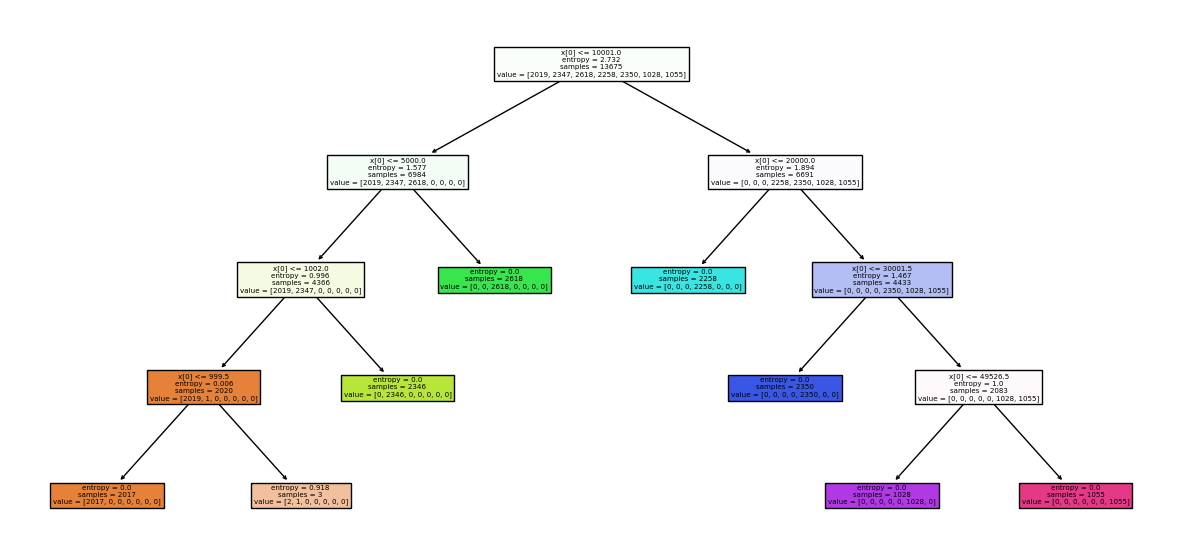

In [ ]:
# Visualizar el árbol de decisión
from sklearn import tree
import graphviz

plt.figure(figsize=(15, 7))
plot_tree(drugTree, filled=True)
plt.show()

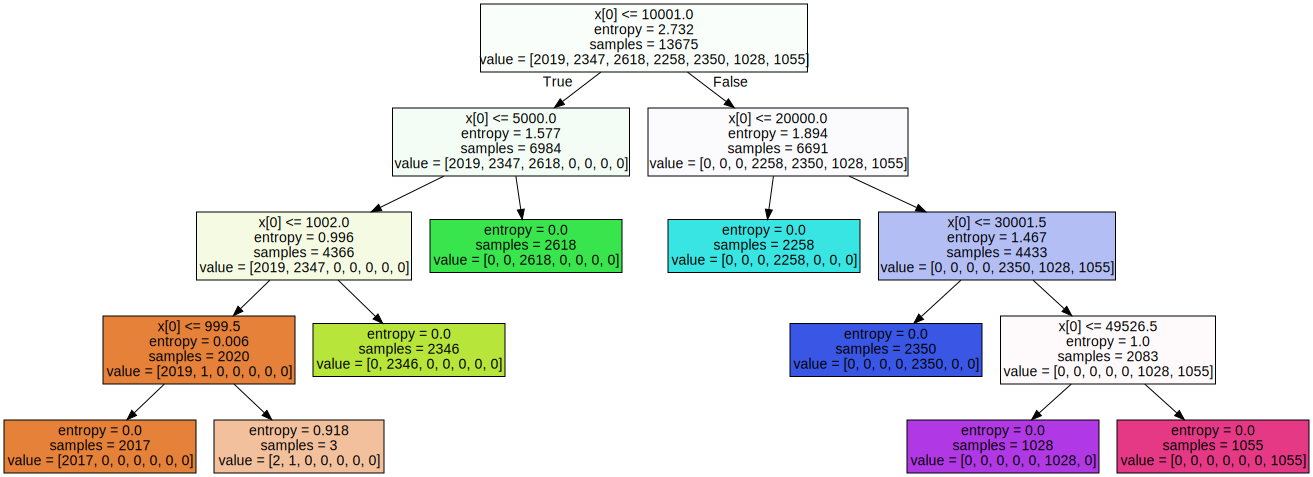

In [ ]:
# Otra forma de graficar
# DOT data
dot_data = tree.export_graphviz(drugTree, out_file=None, filled=True)
# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

# 5. EVALUACIÓN

In [ ]:
print(':: REGRESION LOGISTICA\n')
print(classification_report(y_test, pred))
print("% de presicion de Regresión :", metrics.accuracy_score(y_test, pred))
print("-----------------------------------------------------\n")
print(':: ARBOL DE DESICIONES\n')
print(classification_report(yad_test, predTree))
print("% de precisión del Arbol de Decisión: ", metrics.accuracy_score(yad_test, predTree))

:: REGRESION LOGISTICA

              precision    recall  f1-score   support

           1       0.91      1.00      0.95       789
           2       1.00      0.84      0.91       894
           3       0.88      1.00      0.94       960
           4       1.00      0.89      0.94       897
           5       0.92      1.00      0.96       809
           6       0.97      0.90      0.93       384
           7       1.00      0.97      0.99       396

    accuracy                           0.94      5129
   macro avg       0.95      0.94      0.95      5129
weighted avg       0.95      0.94      0.94      5129

% de presicion de Regresión : 0.9426788847728602
-----------------------------------------------------

:: ARBOL DE DESICIONES

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       564
           2       1.00      1.00      1.00       582
           3       1.00      1.00      1.00       619
           4       1.00      1.00 

## 5.1 Evaluación y Comparación de Algoritmos mediante la curva de ROC

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

def area_bajo_curva(clfs, nombres): # lista de clasificadores a graficar
  """
  Vamos a graficar el area bajo la curva (area under the curve - AUC) de la Característica Operativa del Receptor COR
  mejor conocido como ROC en ingles.
  la curva ROC nos permite ver el desempeño de la clasificacion de muestro modelo con diferentes umbrales de decision (por defecto se usa 0.5)
  """
  # Binarize the output
  y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
  n_classes = y_test_bin.shape[1]

  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  plt.figure(figsize=(20,10))
  lw = 2
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='Base')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('Proporcion de Falsos Positivos')
  plt.ylabel('Proporcion de Verdaderos Positivos')
  plt.title('ROC ejemplo')

  for i, clf in enumerate(clfs):
    classifier = OneVsRestClassifier(clf)
    y_score = classifier.fit(x_train, y_train).predict_proba(x_test)

    # Compute ROC curve and ROC area for each class
    for j in range(n_classes):
        fpr[j], tpr[j], _ = roc_curve(y_test_bin[:, j], y_score[:, j])
        roc_auc[j] = auc(fpr[j], tpr[j])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.plot(fpr["micro"], tpr["micro"], label='ROC %s (area = %0.2f)' % (nombres[i], roc_auc["micro"]))

  plt.legend(loc="lower right")

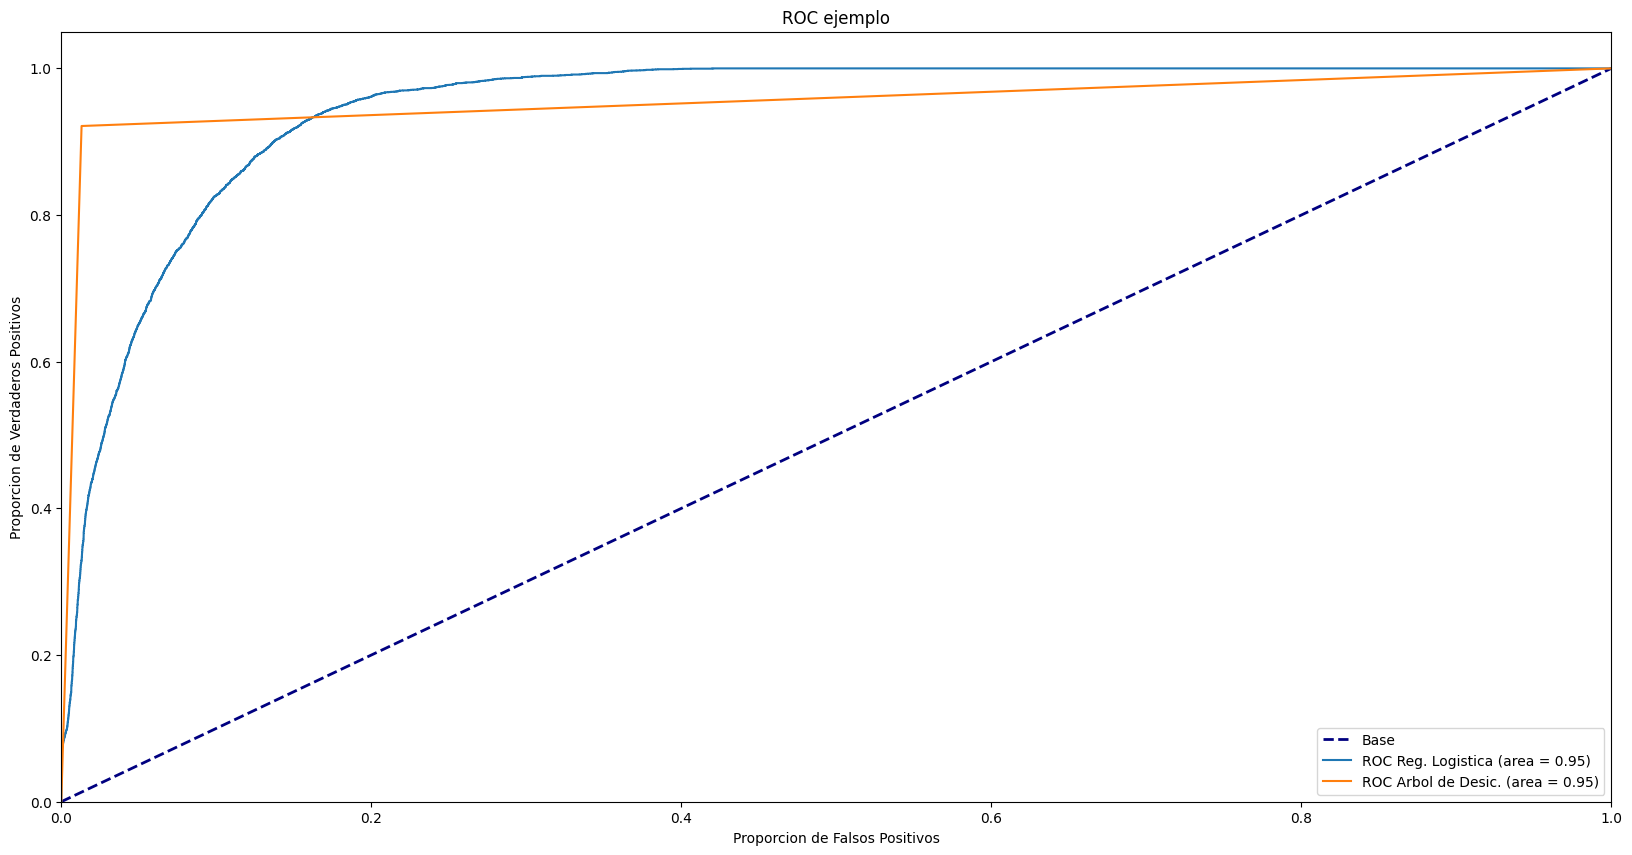

In [ ]:
area_bajo_curva([reg, drugTree], ['Reg. Logistica', 'Arbol de Desic.'])

La curva AUC-ROC representa la tasa de verdaderos positivos (True Positive Rate, TPR) frente a la tasa de falsos positivos (False Positive Rate, FPR) para diferentes umbrales de clasificación.

La línea punteada en la gráfica representa el rendimiento esperado al azar (un clasificador inútil), y el área bajo la curva (AUC) mide el rendimiento del clasificador. Un valor de AUC cercano a 1 indica un buen clasificador, mientras que un valor cercano a 0.5 indica un clasificador que es comparable a la clasificación aleatoria.

# 6. IMPLEMENTACIÓN

**FALTA !!!**
Para proceder con la implementación, primero se debe hacer una retroalimentacion de los resultado obtenido segun la estimacion de presición de cada algoritmo y mejorar el modelado esto dependera de analizar otra vez el conjunto de datos que se tiene que elegir nuevamente las variables dindependientes y mediante algoritmos de optimizacion mejorar el porcentaje de estimación.

Posteriormente se puede desarrollar una interface que me permita ingresar los datos de un cliente como ser su perfil bancario y poder estimar si comprará un Certificado de Depósito, esta herramienta seria muy util a la hora de contactarse con un cliente que acude al banco.

# 7. CONCLUSIONES

**Falta**!!
Entre las conclusiones se tienen las sigueintes apresiaciones:

En este proyecto, se construyo un modelo de clasificador mediante los algoritmos de progresión logística, y árbol de decisiones para predecir si un cliente del banco opta por comprar un certificado de depósito.
El modelo de regresión logística, produce un rendimiento del 88% según sus métodos de evaluación de precisión, y el modelado con el algoritmo de árbol de decisiones con una presicion del 88% también.
la seguridad del automóvil. Construyo dos modelos, uno con criterio índice de Gini y otro con criterio entropía. El modelo produce un rendimiento muy bueno como lo indica la precisión del modelo en ambos casos, que resultó ser 0,8021.
En ambos casos, la puntuación de precisión del conjunto de entrenamiento y del conjunto de prueba es la misma. 70% de entrenamiento y 30% de testeo.
La matriz de confusión y el informe de clasificación producen un rendimiento de modelo bueno.
En ambos casos se pueden hacer predicciones utilizando los modelos datos ciertos parámetros esto es muy útil a la hora de entrevistarse con un cliente y ofrecerle un producto.
Según el método de evaluación mediante la curva de ROC, el mejor modelo de predicción es de regresión logística.
Según la curva de ROC se debe volver a revisar las variables independientes y mejorar el proceso de modelaje para la clasificación de datos y su posterior predicción.

# TRABAJO EN CLASE
# Modelos de clasificacion

x = df_digital[['Visitas', 'n_Periodista','n_Seccion','Hora_Publicacion']]

y = df_digital['Cod_Impacto']

In [ ]:
#from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

#data = load_breast_cancer()
#X, y = d.data, data.target


X = df_digital[['Visitas', 'n_Periodista','n_Seccion','Hora_Publicacion']]
y = df_digital['Cod_Impacto']
#Etiqueta = df_digital['Impacto']
Etiqueta = y

print("Objetivos:",Etiqueta)
print("Dimension de X:", X.shape)
print("Dimension de Y:", y.shape)

Objetivos: 0        7
1        7
2        7
3        7
4        7
        ..
17089    1
17090    1
17091    1
17092    1
17093    1
Name: Cod_Impacto, Length: 17094, dtype: int64
Dimension de X: (17094, 4)
Dimension de Y: (17094,)


In [ ]:
#Dividimos el dataset en entrenamiento y test 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.2,   # 80% train; 20% test
                                                    random_state=0) # colocamos el random seed to 0 para obtener el mismo resultado constantemente
print("Dimension de X_train:", X_train.shape)
print("Dimension de y_train:", y_train.shape)
print("Dimension de X_test:", X_test.shape)
print("Dimension de y_test:", y_test.shape)

Dimension de X_train: (13675, 4)
Dimension de y_train: (13675,)
Dimension de X_test: (3419, 4)
Dimension de y_test: (3419,)


In [ ]:
from sklearn.metrics import classification_report
import pandas as pd
"""
Definimos un metodo para calcular el rendimiento de los clasificadores
"""
def calcular_rendimiento(clf,                     # modelo de classificacion
                         imprimir_reporte=False): # por defecto no imprimir tabla reporte

  y_pred = clf.predict(X_test) # clacificar con el modelo pasado como argumento
  report = classification_report(y_test,                         # resultados verdaderos
                                y_pred,                         # resultados clasificados
                                #target_names=Etiqueta, # nombres de las classes
                                output_dict=True)               # retornar reporte como diccionario para acceder a los resultados
  if imprimir_reporte:
    print(classification_report(y_test,                         # resultados verdaderos
                                y_pred))                         # resultados clasificados
                                #target_names=unique_labels))

  accuracy = report['accuracy']
  precision = report['macro avg']['precision']
  recall = report['macro avg']['recall']
  f1 = report['macro avg']['f1-score']

# estas variables son las que aparecen en la parte final del reporte entre parentesis
  return accuracy, precision, recall, f1

In [ ]:
# Arbol de decisiones
from sklearn.tree import DecisionTreeClassifier

DT_clf = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
calcular_rendimiento(DT_clf, imprimir_reporte = True)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       564
           2       1.00      1.00      1.00       582
           3       1.00      1.00      1.00       619
           4       1.00      1.00      1.00       574
           5       1.00      1.00      1.00       545
           6       1.00      1.00      1.00       265
           7       1.00      1.00      1.00       270

    accuracy                           1.00      3419
   macro avg       1.00      1.00      1.00      3419
weighted avg       1.00      1.00      1.00      3419



(1.0, 1.0, 1.0, 1.0)

In [ ]:
# Regresión logística
from sklearn.linear_model import LogisticRegression

# max_iter 2500 por que el modelo no convergia, varemos mas adelante cual sera el mejor valor
LR_clf = LogisticRegression(random_state=0,max_iter=5500).fit(X_train, y_train)
calcular_rendimiento(LR_clf, imprimir_reporte=True)

              precision    recall  f1-score   support

           1       0.94      0.90      0.92       564
           2       0.79      0.74      0.77       582
           3       0.65      0.71      0.68       619
           4       0.58      0.50      0.54       574
           5       0.57      0.67      0.61       545
           6       0.47      0.36      0.41       265
           7       0.75      0.87      0.81       270

    accuracy                           0.69      3419
   macro avg       0.68      0.68      0.68      3419
weighted avg       0.69      0.69      0.69      3419



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.6902603100321731,
 0.6779446642992664,
 0.6787175430895697,
 0.6754133559309274)

In [ ]:
# kNN
from sklearn.neighbors import KNeighborsClassifier

KNN_clf = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
calcular_rendimiento(KNN_clf, imprimir_reporte=True)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       564
           2       1.00      0.99      1.00       582
           3       1.00      1.00      1.00       619
           4       1.00      1.00      1.00       574
           5       1.00      1.00      1.00       545
           6       1.00      1.00      1.00       265
           7       1.00      1.00      1.00       270

    accuracy                           1.00      3419
   macro avg       1.00      1.00      1.00      3419
weighted avg       1.00      1.00      1.00      3419



(0.999122550453349, 0.9992870680827587, 0.9992636229749632, 0.9992739111219241)

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

GNB_clf = GaussianNB().fit(X_train, y_train)
calcular_rendimiento(GNB_clf, imprimir_reporte=True)

              precision    recall  f1-score   support

           1       0.96      1.00      0.98       564
           2       0.98      0.96      0.97       582
           3       0.96      0.98      0.97       619
           4       1.00      0.96      0.98       574
           5       0.97      1.00      0.98       545
           6       0.96      0.93      0.95       265
           7       1.00      0.97      0.98       270

    accuracy                           0.97      3419
   macro avg       0.98      0.97      0.97      3419
weighted avg       0.98      0.97      0.97      3419



(0.974846446329336, 0.976301089029746, 0.9707970143287177, 0.9732901671551015)

## Intentemos mejorar el rendimiento de los modelos

In [ ]:
# Arboles de decisión
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

def optimo_grid_search(clf,                           # clasificador que vamos a tunear
                       parametros,                    # parametros a tunear para el clasificador
                       refit_score='precision'):      # parametro a optimizar, por defecto precision; puede ser [precision, recall, accuracy]

   # Funcion para buscar los valores optimos de un classificador, usando GridSearch.

    scorers = {                                       # definimos los parametros para comparar el rendimiento del clasificador (para saber si mejora o no)
        'precision': make_scorer(precision_score),
        'recall': make_scorer(recall_score),
        'accuracy': make_scorer(accuracy_score)
    }
    grid_search = GridSearchCV(clf,                     # clasificador
                               parametros,              # parametros para probar en el clasificador
                               scoring=scorers,         # las metricas de comparacion
                               refit=refit_score,       # cual de las metricas usara para optimizar
                               return_train_score=True, # nos permite ver el impacto de cambiar los parametros
                               n_jobs=-1)               # -1 = usar toda la capacidad del procesador(es)
    grid_search.fit(X_train, y_train)

    print('Los mejores parametros para {} son:'.format(refit_score))
    print(grid_search.best_params_)

    return grid_search

In [ ]:
DT_clf_tuned = DecisionTreeClassifier(random_state=0)


#Podemos ver todos los parametros que se pueden
#tunear para los arboles de decision en:

#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# Definimos los parámetros que queremos tunear
parametros = {
    'criterion': ['gini', 'entropy'],  # El nombre correcto es 'criterion'
    'splitter': ['best', 'random'],
    'max_depth': [None, 2, 4, 6, 10, 20]
}

# Realizamos la búsqueda de hiperparámetros con GridSearchCV
grid_search = GridSearchCV(DT_clf_tuned, parametros, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# El modelo optimizado se encuentra en grid_search.best_estimator_
DT_clf_tuned = grid_search.best_estimator_

# Calculamos el rendimiento del modelo optimizado
print()
calcular_rendimiento(DT_clf_tuned, imprimir_reporte=True)


              precision    recall  f1-score   support

           1       1.00      1.00      1.00       564
           2       1.00      1.00      1.00       582
           3       1.00      1.00      1.00       619
           4       1.00      1.00      1.00       574
           5       1.00      1.00      1.00       545
           6       1.00      1.00      1.00       265
           7       1.00      1.00      1.00       270

    accuracy                           1.00      3419
   macro avg       1.00      1.00      1.00      3419
weighted avg       1.00      1.00      1.00      3419



(1.0, 1.0, 1.0, 1.0)

In [ ]:
#Mejorado REGRESION LOGISTICA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy.stats import randint
import numpy as np

# Definimos el pipeline que incluye el escalado de los datos
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Escalamos los datos
    ('log_reg', LogisticRegression(random_state=0))
])

# Definimos los parámetros para la búsqueda de hiperparámetros
parametros = {
    'log_reg__max_iter': [500],  # Aumentamos las iteraciones
    'log_reg__penalty': ['l2', None],         # Usamos 'l2' o None para la penalización
    'log_reg__solver': ['saga', 'lbfgs'],     # Solvers compatibles con 'l2' y sin regularización
    'log_reg__class_weight': ['balanced', None]  # Peso de las clases
}

# Realizamos la búsqueda de hiperparámetros con RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, parametros, n_iter=50, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# El modelo optimizado se encuentra en random_search.best_estimator_
LR_clf_tuned = random_search.best_estimator_

# Calculamos el rendimiento del modelo optimizado
print("Mejores parámetros encontrados:", random_search.best_params_)
calcular_rendimiento(LR_clf_tuned, imprimir_reporte=True)



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 8 is smaller than n_iter=50. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.

Mejores parámetros encontrados: {'log_reg__solver': 'lbfgs', 'log_reg__penalty': None, 'log_reg__max_iter': 500, 'log_reg__class_weight': None}
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       564
           2       1.00      1.00      1.00       582
           3       1.00      1.00      1.00       619
           4       1.00      1.00      1.00       574
           5       1.00      1.00      1.00       545
           6       1.00      1.00      1.00       265
           7       1.00      1.00      1.00       270

    accuracy                           1.00      3419
   macro avg       1.00      1.00      1.00      3419
weighted avg       1.00      1.00      1.00      3419



(1.0, 1.0, 1.0, 1.0)

In [ ]:
# definimos el modelo sin entrenarlo:
KNN_clf_tuned = KNeighborsClassifier()

"""
Podemos ver todos los parametros que se pueden
tunear para KNN de decision en:

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
"""

parametros = {
    'n_neighbors': [1, 3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}

KNN_clf_tuned = optimo_grid_search(KNN_clf_tuned, parametros)
print()
calcular_rendimiento(KNN_clf_tuned, imprimir_reporte=True)

In [ ]:
# definimos el modelo sin entrenarlo:
GNB_clf_tuned = GaussianNB().fit(X_train, y_train)

"""
Como podemos ver en:

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

El algoritmo Naive Bayes no tiene parametros que nos interese tunear; por este motivo el modelo ya se encuentra con el mejor rendimiento
"""

calcular_rendimiento(GNB_clf_tuned, imprimir_reporte=True)

              precision    recall  f1-score   support

           1       0.96      1.00      0.98       564
           2       0.98      0.96      0.97       582
           3       0.96      0.98      0.97       619
           4       1.00      0.96      0.98       574
           5       0.97      1.00      0.98       545
           6       0.96      0.93      0.95       265
           7       1.00      0.97      0.98       270

    accuracy                           0.97      3419
   macro avg       0.98      0.97      0.97      3419
weighted avg       0.98      0.97      0.97      3419



(0.974846446329336, 0.976301089029746, 0.9707970143287177, 0.9732901671551015)

## Ahora veremos cual de los modelos es el mejor

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

def area_bajo_curva(clfs, nombres): # lista de clasificadores a graficar
  """
  Vamos a graficar el area bajo la curva (area under the curve - AUC) de la Característica Operativa del Receptor COR
  mejor conocido como ROC en ingles.
  la curva ROC nos permite ver el desempeño de la clasificacion de muestro modelo con diferentes umbrales de decision (por defecto se usa 0.5)
  """
  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  plt.figure(figsize=(20,10))
  lw = 2
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='Base')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('Proporcion de Falsos Positivos')
  plt.ylabel('Proporcion de Verdaderos Positivos')
  plt.title('ROC ejemplo')

  for i, clf in enumerate(clfs):
    # Binarize the output
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    n_classes = y_test_bin.shape[1]

    if n_classes == 2:
        y_score = clf.predict_proba(X_test)[:, 1]
        fpr[i], tpr[i], th = roc_curve(y_test, y_score)
    else:
        classifier = OneVsRestClassifier(clf)
        y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

        # Compute ROC curve and ROC area for each class
        for j in range(n_classes):
            fpr[j], tpr[j], _ = roc_curve(y_test_bin[:, j], y_score[:, j])
            roc_auc[j] = auc(fpr[j], tpr[j])

        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        # Plot ROC curve for micro-average
        plt.plot(fpr["micro"], tpr["micro"],
                 label='micro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["micro"]))

    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label='ROC %s (area = %0.2f)' % (nombres[i], roc_auc[i]))

  plt.legend(loc="lower right")

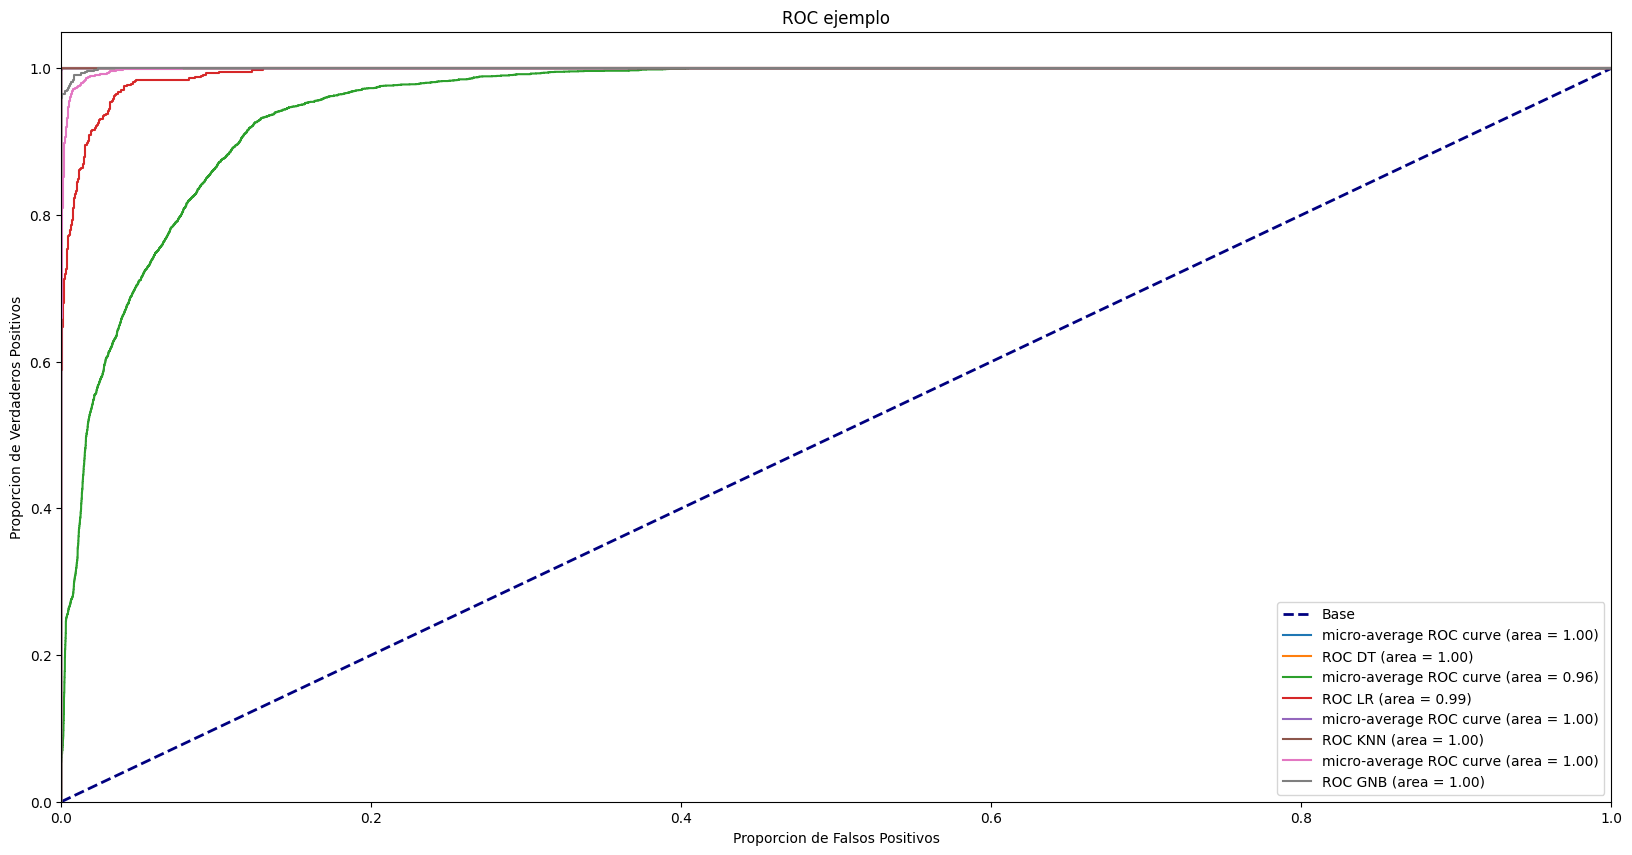

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


area_bajo_curva([DT_clf_tuned, LR_clf_tuned, KNN_clf_tuned, GNB_clf_tuned], ['DT', 'LR', 'KNN', 'GNB'])
